***
***
# 数据抓取
   >  使用Selenium提取人民网搜索数据

***
***

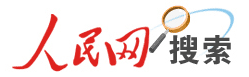

http://search.people.com.cn/cnpeople/news/getNewsResult.jsp

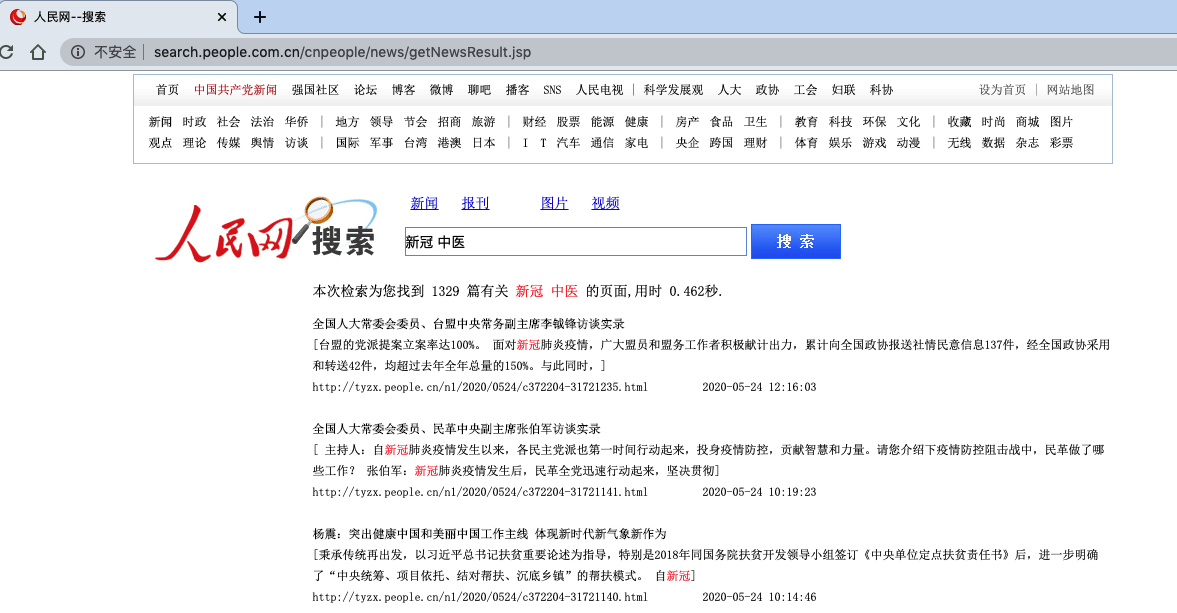


点击下一页页面的URL不变

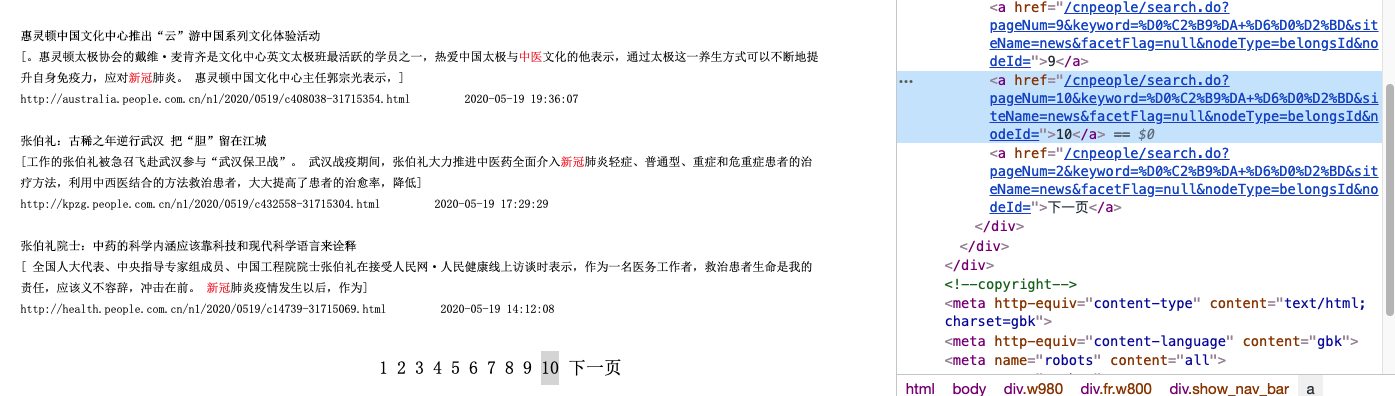


鼠标右键查看页码

In [12]:
url = 'http://search.people.com.cn/cnpeople/search.do?pageNum='
path = '&keyword=%D0%C2%B9%DA+%D6%D0%D2%BD&siteName=news&facetFlag=null&nodeType=belongsId&nodeId='
page_num = range(1, 30)
urls = [url+str(i)+path for i in page_num]
for i in urls[-3:]:
    print(i)
    

http://search.people.com.cn/cnpeople/search.do?pageNum=27&keyword=%D0%C2%B9%DA+%D6%D0%D2%BD&siteName=news&facetFlag=null&nodeType=belongsId&nodeId=
http://search.people.com.cn/cnpeople/search.do?pageNum=28&keyword=%D0%C2%B9%DA+%D6%D0%D2%BD&siteName=news&facetFlag=null&nodeType=belongsId&nodeId=
http://search.people.com.cn/cnpeople/search.do?pageNum=29&keyword=%D0%C2%B9%DA+%D6%D0%D2%BD&siteName=news&facetFlag=null&nodeType=belongsId&nodeId=


## 无法通过requests直接获取

提醒：您的访问可能对网站造成危险，已被云防护安全拦截

```
import requests
from bs4 import BeautifulSoup

content = requests.get(urls[0])
content.encoding = 'utf-8'

soup = BeautifulSoup(content.text, 'html.parser') 
soup
```

In [ ]:
import requests
from bs4 import BeautifulSoup

content = requests.get(urls[0])
content.encoding = 'utf-8'
soup = BeautifulSoup(content.text, 'html.parser') 
soup

In [13]:
from selenium import webdriver
from bs4 import BeautifulSoup
import time

browser = webdriver.Chrome()
dat = []
for k, j in enumerate(urls):
    print(k+1)
    time.sleep(1)
    browser.get(j) 
    source = browser.page_source
    soup = BeautifulSoup(source, 'html.parser') 
    d = soup.find_all('ul')
    while len(d) < 2:
        print(k+1, 'null error and retry')
        time.sleep(1)
        browser.get(j) 
        source = browser.page_source
        soup = BeautifulSoup(source, 'html.parser') 
        d = soup.find_all('ul')
        
    for i in d[1:]:
        urli = i.find('a')['href']
        title = i.find('a').text
        time_stamp = i.find_all('li')[-1].text.split('\xa0')[-1]
        dat.append([k+1, urli, title, time_stamp])

browser.close()
len(dat)

1
2
3
4
5
6
7
8
9
10
11
11 null error and retry
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


1416

In [14]:
import pandas as pd
df = pd.DataFrame(dat, columns = ['pagenum', 'url', 'title', 'time'])
df.head()

pagenum                                                url  \
0        1  http://health.people.com.cn/n1/2020/0606/c1473...   
1        1  http://health.people.com.cn/n1/2020/0606/c1473...   
2        1  http://politics.people.com.cn/n1/2020/0606/c10...   
3        1  http://opinion.people.com.cn/n1/2020/0606/c100...   
4        1  http://health.people.com.cn/n1/2020/0605/c1473...   

                             title                 time  
0  [全国首部新型冠状病毒肺炎中医医案类专著在京举行新书首发仪式]  2020-06-06 10:33:49  
1                    为维护人民健康提供有力保障  2020-06-06 08:48:46  
2                    为维护人民健康提供有力保障  2020-06-06 05:09:28  
3            人民日报评论员：强化公共卫生体系的科技支撑  2020-06-06 05:07:22  
4                  防控疫情，中医药发挥了重要作用  2020-06-05 08:36:27

In [16]:
len(df)

1416

In [17]:
df.to_csv('../data/people_com_search20200606.csv', index = False)

## Reading data with Pandas

In [20]:
with open('../data/people_com_search20200606.csv', 'r') as f:
    lines = f.readlines()
len(lines)

1423

In [21]:
import pandas as pd
df2 = pd.read_csv('../data/people_com_search20200606.csv')
df2.head()
len(df2)

1416

In [24]:
for i in df2['url'].tolist()[:10]:
    print(i)

http://health.people.com.cn/n1/2020/0606/c14739-31737564.html
http://health.people.com.cn/n1/2020/0606/c14739-31737424.html
http://politics.people.com.cn/n1/2020/0606/c1001-31737282.html
http://opinion.people.com.cn/n1/2020/0606/c1003-31737274.html
http://health.people.com.cn/n1/2020/0605/c14739-31736476.html
http://politics.people.com.cn/n1/2020/0605/c1001-31735966.html
http://world.people.com.cn/n1/2020/0604/c1002-31735815.html
http://www.people.com.cn/n1/2020/0604/c32306-31735734.html
http://cpc.people.com.cn/n1/2020/0604/c419242-31735244.html
http://health.people.com.cn/n1/2020/0604/c14739-31734772.html
